In [2]:
from heat import *
from heat_pinn import *
TIMER_REPEAT_TIMES = 10


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

train_bc_points shape (240, 2)
train_points shape (2780, 2)
train_next_batch shape (3020, 2)
Compiling model...
Building feed-forward neural network...
'build' took 0.026883 s



2021-12-14 17:00:17.053767: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-14 17:00:17.054337: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-14 17:00:17.073866: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2021-12-14 17:00:17.073901: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: radian-ubuntu
2021-12-14 17:00:17.073906: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: radian-ubuntu
2021-12-14 17:00:17.074003: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.86.0
2021-12-14 17:00:17.074023: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.86.0
2021-12-14 17:00:17.074027: I tensorflow/stream_executor/cuda/cuda_diagnos

'compile' took 0.318587 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.14e-01, 8.36e-02, 7.30e-01]    [3.09e-01, 8.36e-02, 7.30e-01]    []  


2021-12-14 17:00:17.350247: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-12-14 17:00:17.375138: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593345000 Hz


1000      [3.46e-03, 2.24e-03, 2.24e-03]    [2.47e-03, 2.24e-03, 2.24e-03]    []  
2000      [3.82e-04, 4.53e-05, 2.95e-05]    [2.16e-04, 4.53e-05, 2.95e-05]    []  
3000      [1.81e-04, 8.27e-06, 9.10e-06]    [1.02e-04, 8.27e-06, 9.10e-06]    []  
4000      [1.23e-04, 5.19e-06, 3.87e-06]    [6.75e-05, 5.19e-06, 3.87e-06]    []  
5000      [7.92e-05, 5.81e-06, 1.72e-06]    [4.57e-05, 5.81e-06, 1.72e-06]    []  
6000      [5.00e-05, 5.52e-06, 9.85e-07]    [3.02e-05, 5.52e-06, 9.85e-07]    []  
7000      [3.25e-05, 5.34e-06, 7.57e-07]    [2.13e-05, 5.34e-06, 7.57e-07]    []  
8000      [2.73e-05, 1.06e-05, 3.49e-06]    [1.67e-05, 1.06e-05, 3.49e-06]    []  
9000      [1.54e-05, 2.74e-06, 3.94e-07]    [9.81e-06, 2.74e-06, 3.94e-07]    []  
10000     [1.19e-05, 1.70e-06, 2.69e-07]    [7.56e-06, 1.70e-06, 2.69e-07]    []  
11000     [1.40e-05, 1.49e-06, 8.64e-07]    [1.02e-05, 1.49e-06, 8.64e-07]    []  
12000     [2.11e-05, 7.32e-05, 1.05e-04]    [1.44e-05, 7.32e-05, 1.05e-04]    []  
1300

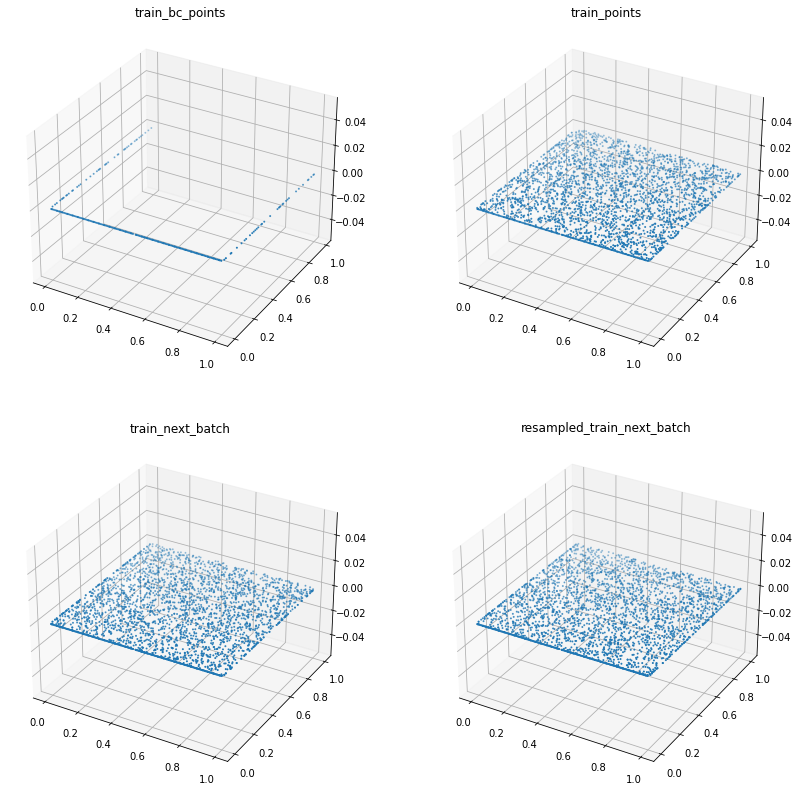

In [3]:
# Train best PINN model
const_params = HeatConstParam()
pinn_params = PinnParam()

geomtime_data, model = create_model(const_params, pinn_params)
plot_train_data(geomtime_data)
losshistory, train_state = train_model(model)


heat_1d_boundary_sin_exact: Average time with 10 tries: 0.0001 seconds
finite_difference_crank_nicolson: Average time with 10 tries: 0.0024 seconds
NN prediction: Average time with 10 tries: 0.0012 seconds
--- Numerical vs Analytical Report ---
Mean absolute error:  0.00011815978705038325
Mean squared error:  2.137062220290941e-08
Max error:  0.00031068655212002083
--- NN vs Analytical Report ---
Mean absolute error:  0.00010021498535477318
Mean squared error:  1.9256860004341365e-08
Max error:  0.0010275412350892997
Heat Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 30
test_t_dim: 100
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson



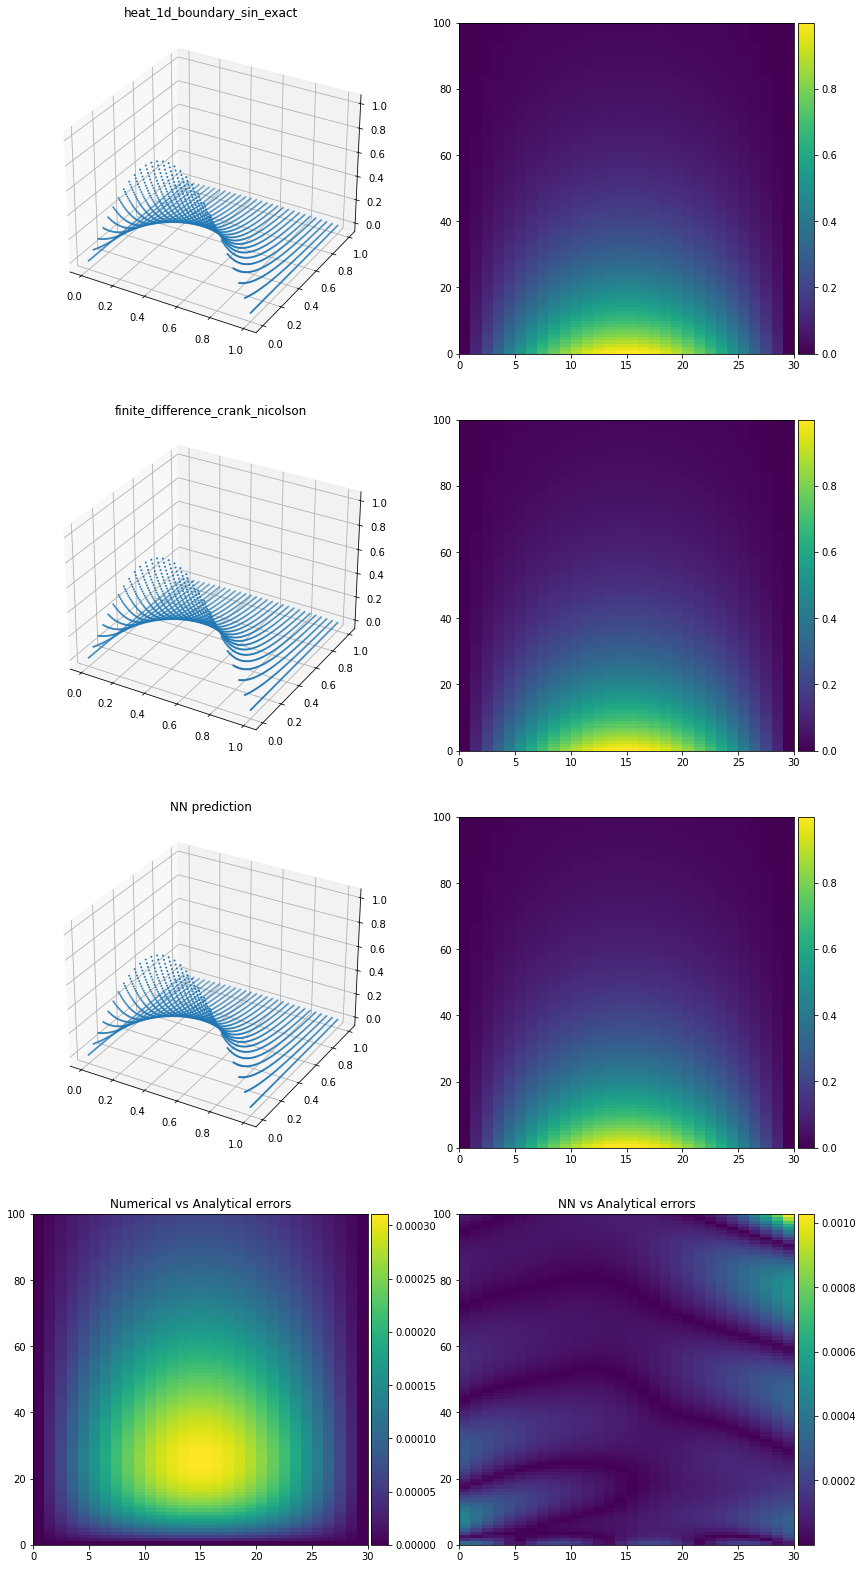

In [4]:
# Find some good numerical solution

const_params.test_x_dim = 30
const_params.test_t_dim = 100
const_params.numerical_function_name = "finite_difference_crank_nicolson"

solve_analytical_and_numerical(const_params, timer_repeat_times=TIMER_REPEAT_TIMES)
predict_and_output_report(model, const_params, timer_repeat_times=TIMER_REPEAT_TIMES)


heat_1d_boundary_sin_exact: Average time with 10 tries: 0.0005 seconds
finite_difference_crank_nicolson: Average time with 10 tries: 0.0300 seconds
NN prediction: Average time with 10 tries: 0.0015 seconds
--- Numerical vs Analytical Report ---
Mean absolute error:  1.6081942338127432e-05
Mean squared error:  3.8394288026295904e-10
Max error:  4.111431766423701e-05
--- NN vs Analytical Report ---
Mean absolute error:  9.706920514570281e-05
Mean squared error:  1.7674061501183604e-08
Max error:  0.0010278392583131766
Heat Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 200
test_t_dim: 100
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson



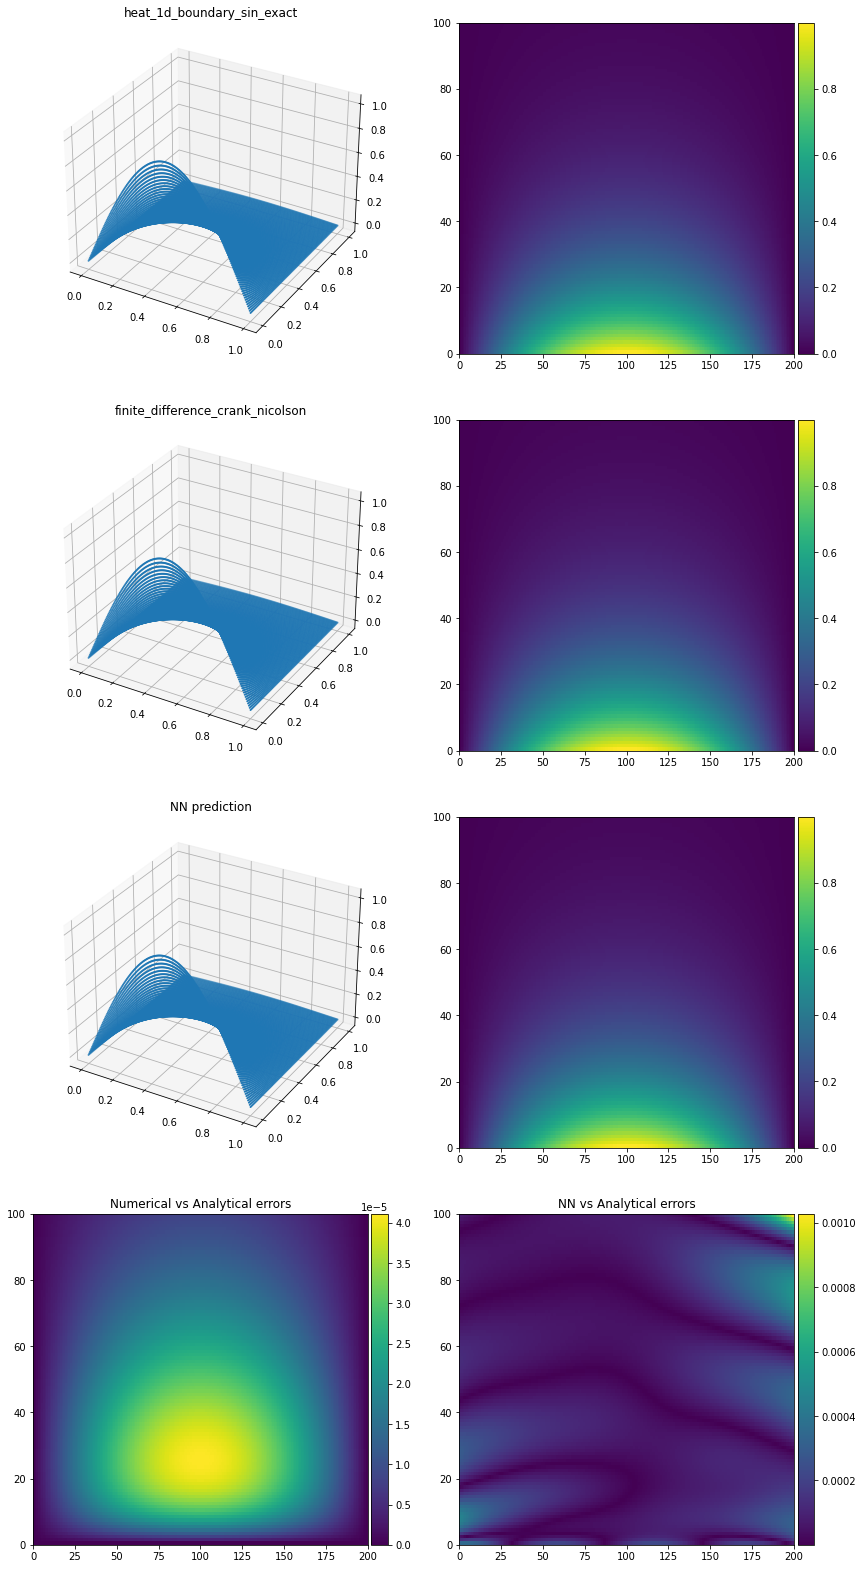

In [5]:
# Find bad numerical solution

const_params.test_x_dim = 200
const_params.test_t_dim = 100
const_params.numerical_function_name = "finite_difference_crank_nicolson"

solve_analytical_and_numerical(const_params, timer_repeat_times=TIMER_REPEAT_TIMES)
predict_and_output_report(model, const_params, timer_repeat_times=TIMER_REPEAT_TIMES)


heat_1d_boundary_sin_exact: Average time with 10 tries: 0.0050 seconds
finite_difference_crank_nicolson: Average time with 10 tries: 0.5864 seconds
NN prediction: Average time with 10 tries: 0.0215 seconds
--- Numerical vs Analytical Report ---
Mean absolute error:  1.1472653100163591e-06
Mean squared error:  1.9374791423653567e-12
Max error:  2.905616326487337e-06
--- NN vs Analytical Report ---
Mean absolute error:  9.63784949150994e-05
Mean squared error:  1.7262413766316255e-08
Max error:  0.0010275412350892997
Heat Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 300
test_t_dim: 1000
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson



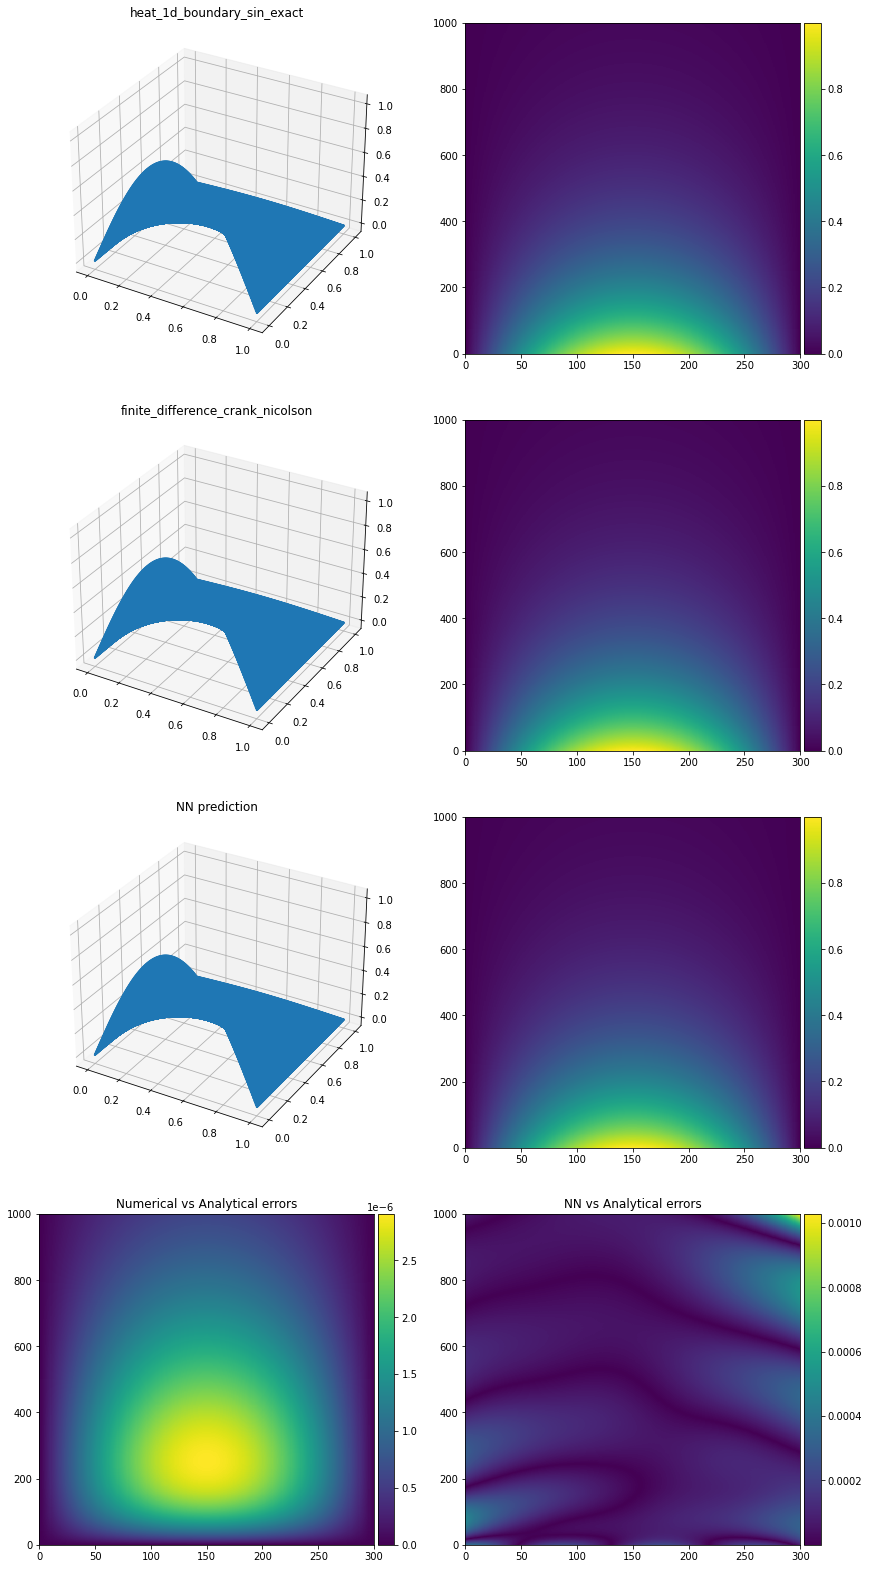

In [6]:
# A high resolution example where both should be good
const_params.test_x_dim = 300
const_params.test_t_dim = 1000
const_params.numerical_function_name = "finite_difference_crank_nicolson"

solve_analytical_and_numerical(const_params, timer_repeat_times=TIMER_REPEAT_TIMES)
predict_and_output_report(model, const_params, timer_repeat_times=TIMER_REPEAT_TIMES)


heat_1d_boundary_sin_exact: Average time with 10 tries: 0.0001 seconds
finite_difference_euler: Average time with 10 tries: 0.0001 seconds
NN prediction: Average time with 10 tries: 0.0004 seconds
--- Numerical vs Analytical Report ---
Mean absolute error:  0.05803205971431045
Mean squared error:  0.0065539323063172955
Max error:  0.23134047963561372
--- NN vs Analytical Report ---
Mean absolute error:  0.00011465368092402821
Mean squared error:  2.7131400417032594e-08
Max error:  0.0010275412350892997
Heat Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 7
test_t_dim: 100
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_euler



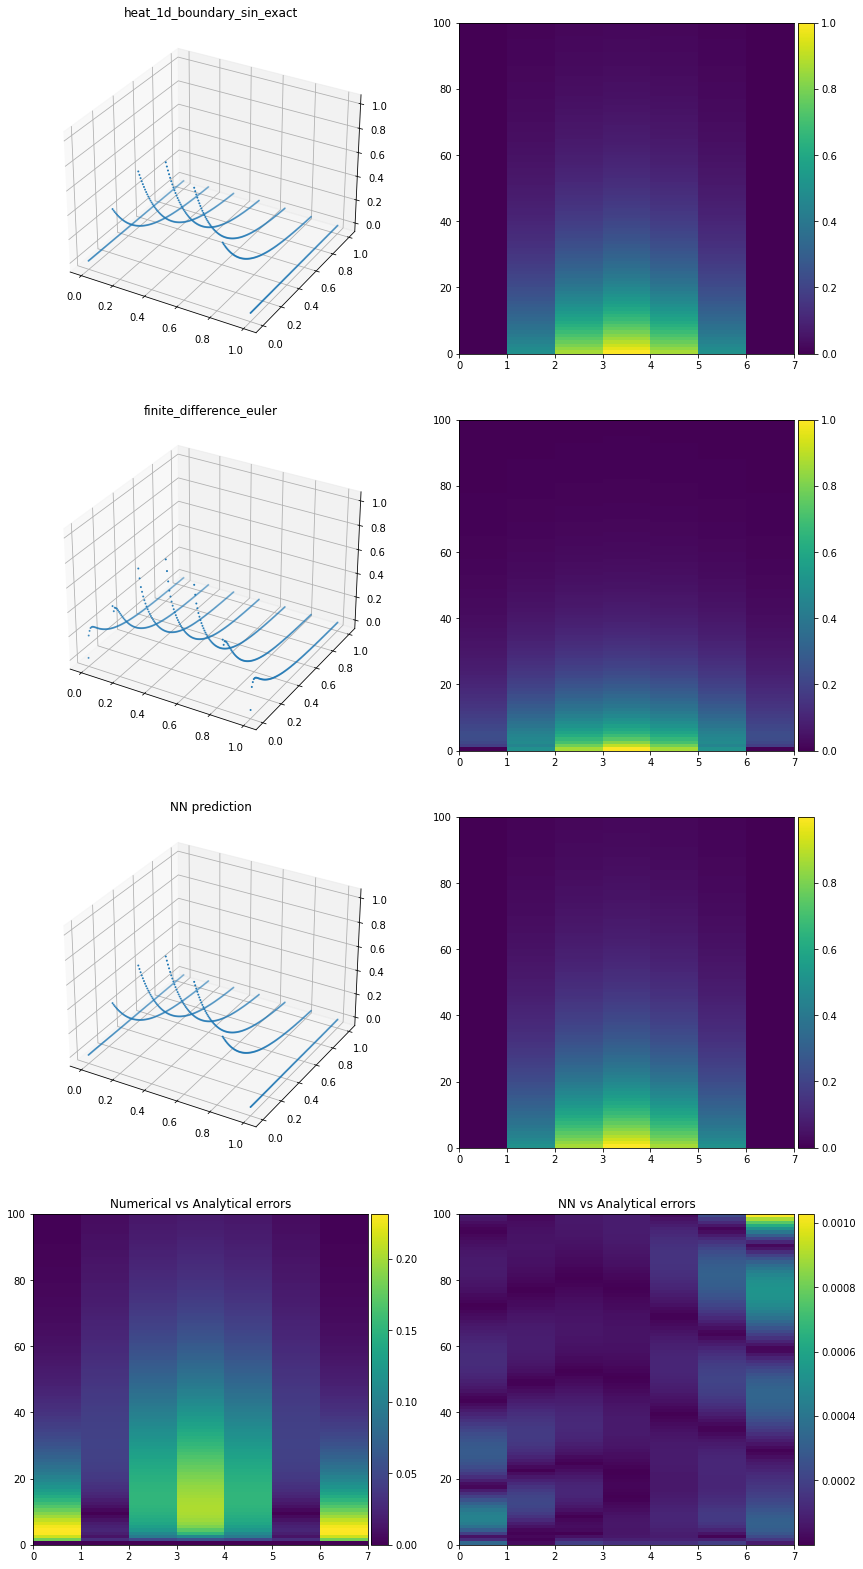

In [7]:
# Find some good numerical solution

const_params.test_x_dim = 7
const_params.test_t_dim = 100
const_params.numerical_function_name = "finite_difference_euler"

solve_analytical_and_numerical(const_params, timer_repeat_times=TIMER_REPEAT_TIMES)
predict_and_output_report(model, const_params, timer_repeat_times=TIMER_REPEAT_TIMES)

heat_1d_boundary_sin_exact: Average time with 10 tries: 0.0002 seconds
finite_difference_euler: Average time with 10 tries: 0.0002 seconds
NN prediction: Average time with 10 tries: 0.0009 seconds
--- Numerical vs Analytical Report ---
Mean absolute error:  3.420134649046916e+144
Mean squared error:  1.3258164460146749e+291
Max error:  5.112220512603563e+146
--- NN vs Analytical Report ---
Mean absolute error:  0.00010021498535477318
Mean squared error:  1.9256860004341365e-08
Max error:  0.0010275412350892997
Heat Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 30
test_t_dim: 100
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_euler



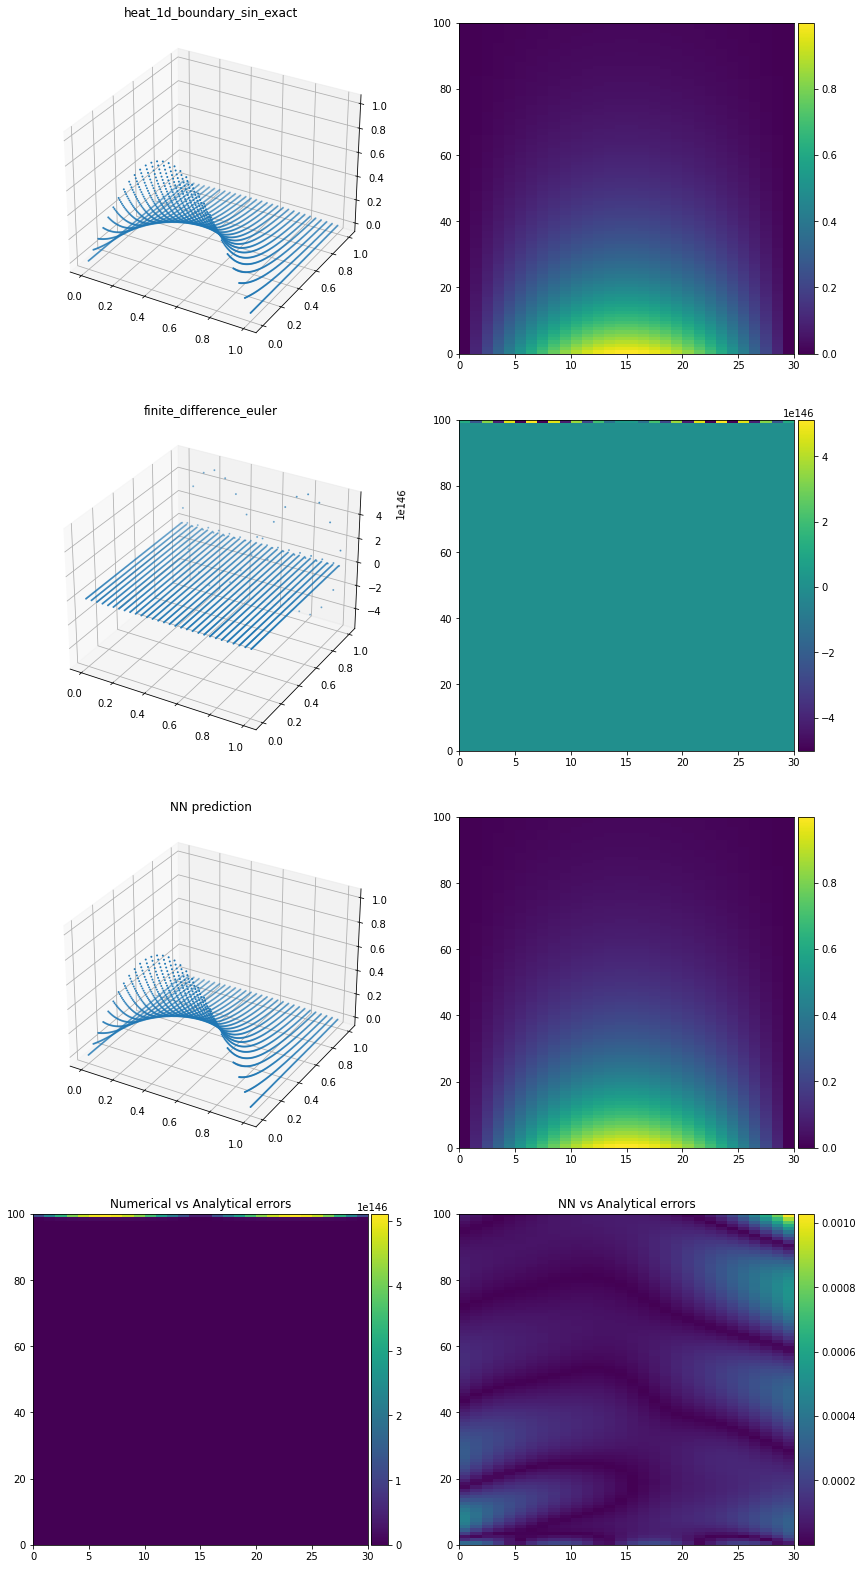

In [8]:
# Find bad numerical solution

const_params.test_x_dim = 30
const_params.test_t_dim = 100
const_params.numerical_function_name = "finite_difference_euler"

solve_analytical_and_numerical(const_params, timer_repeat_times=TIMER_REPEAT_TIMES)
predict_and_output_report(model, const_params, timer_repeat_times=TIMER_REPEAT_TIMES)